In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle

from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker

plt.rc('text', usetex=True)

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'cmr10'  # Computer Modern Roman
mpl.rcParams['font.size'] = 12  # Adjust the font size as needed

In [3]:
with open('/Users/adamboesky/Research/ay98/Weird_Galaxies/final_host_prop_train_history.pkl', 'rb') as f:
    host_prop_train_history = pickle.load(f)
with open('/Users/adamboesky/Research/ay98/Weird_Galaxies/Paper/final_domain_transfer_train_history.pkl', 'rb') as f:
    domain_transfer_train_history = pickle.load(f)

/var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/ipykernel_47759/2231314084.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(2, 1, figsize=(8, 6))


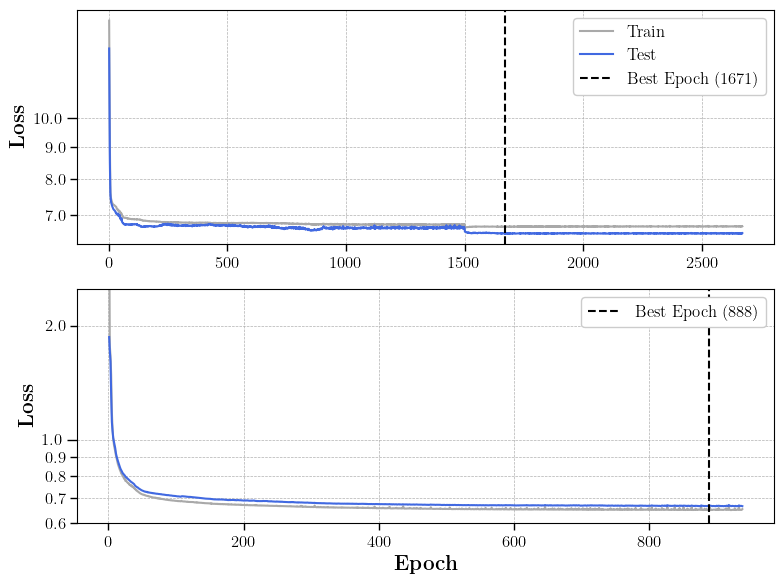

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
fs = 15

# HOST PROP
axes[0].grid(True, which="both", ls="--", lw=0.5)
axes[0].set_yscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(host_prop_train_history['train']), 1) + 1
axes[0].plot(epochs, host_prop_train_history['train'], label='Train', color='darkgray')
axes[0].plot(epochs, host_prop_train_history['test'], label='Test', color='royalblue')
axes[0].set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes[0].tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes[0].tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes[0].tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(host_prop_train_history['test']) + 1
axes[0].axvline(x=best_epoch, linestyle='--', color='k', label=f'Best Epoch ({best_epoch})')
axes[0].legend(loc='upper right', framealpha=1)

# SED
axes[1].grid(True, which="both", ls="--", lw=0.5)
axes[1].set_yscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(domain_transfer_train_history['train']), 1) + 1
axes[1].plot(epochs, domain_transfer_train_history['train'], color='darkgray')
axes[1].plot(epochs, domain_transfer_train_history['test'], color='royalblue')
axes[1].set_xlabel(r'\textbf{Epoch}', fontsize=fs)
axes[1].set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes[1].tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes[1].tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes[1].tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(domain_transfer_train_history['test']) + 1
axes[1].axvline(x=best_epoch, linestyle='--', color='k', label=f'Best Epoch ({best_epoch})')
axes[1].legend(loc='upper right', framealpha=1)
axes[1].set_ylim((0.6, 2.5))

def integer_formatter(x, pos):
    """Attempt to format tick labels as integers, ignoring the position."""
    return f"{round(x, 1)}"


# Apply the custom formatter to each axis
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(integer_formatter))
    ax.yaxis.set_minor_formatter(ticker.FuncFormatter(integer_formatter))


plt.tight_layout()
plt.savefig('Figures/combined_train_history.pdf', bbox_inches='tight')

# Updated Version

In [4]:
import os
grid_results = []
# for fname in os.listdir('/n/home04/aboesky/berger/Weird_Galaxies/grid_search/results'):
for fname in os.listdir('/Users/adamboesky/Research/ay98/Weird_Galaxies/Paper/weighted_host_prop_grid_search/results'):
    with open(f'/Users/adamboesky/Research/ay98/Weird_Galaxies/Paper/weighted_host_prop_grid_search/results/{fname}', 'rb') as f:
        grid_results.append(pickle.load(f))

# Get the best loss
best_dt_loss = {'test': np.inf, 'train': np.inf, 'unweighted': np.inf}
best_params = None
for params, loss in grid_results:
    if np.min(loss['unweighted']) < np.min(best_dt_loss['unweighted']):
        best_params = params
        best_dt_loss = loss

print(f'The best parameter combination in our grid search are:\n\nbatch_size, nodes_per_layer, num_linear_output_layers, learning_rate\n{best_params[::-1]}')

The best parameter combination in our grid search are:

batch_size, nodes_per_layer, num_linear_output_layers, learning_rate
[8.0, 4096, [18, 15, 12, 9, 6, 4], 3, 0.01]


In [5]:
grid_results = []
for fname in os.listdir('/Users/adamboesky/Research/ay98/Weird_Galaxies/Paper/domain_transfer_grid_search/results'):
    with open(f'/Users/adamboesky/Research/ay98/Weird_Galaxies/Paper/domain_transfer_grid_search/results/{fname}', 'rb') as f:
        grid_results.append(pickle.load(f))
# Get the best loss
best_host_pred_loss = {'test': np.inf, 'train': np.inf}
best_params = None
for params, loss in grid_results:
    if np.min(loss['test']) < np.min(best_host_pred_loss['test']):
        best_params = params
        best_host_pred_loss = loss

print(f'The best parameter combination in our grid search are:\n\nbatch_size, nodes_per_layer, num_linear_output_layers, learning_rate\n{best_params[::-1]}')

The best parameter combination in our grid search are:

batch_size, nodes_per_layer, num_linear_output_layers, learning_rate
[4096, [7, 9, 11, 13], 1, 0.001]


/var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/ipykernel_39621/3822052355.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(2, 1, figsize=(8, 6))


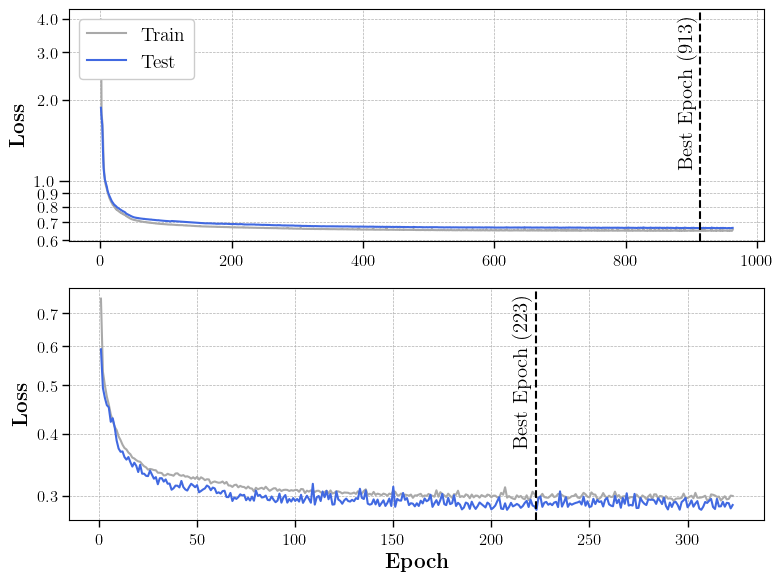

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
fs = 15

# HOST PROP
axes[0].grid(True, which="both", ls="--", lw=0.5)
axes[0].set_yscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(best_host_pred_loss['train']), 1) + 1
axes[0].plot(epochs, best_host_pred_loss['train'], label='Train', color='darkgray')
axes[0].plot(epochs, best_host_pred_loss['test'], label='Test', color='royalblue')
axes[0].set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes[0].tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes[0].tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes[0].tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(best_host_pred_loss['test']) + 1
axes[0].axvline(x=best_epoch, linestyle='--', color='k')
axes[0].annotate(f'Best Epoch ({best_epoch})',
                 xy=(best_epoch-30, 0.64), xycoords=('data', 'axes fraction'),
                 xytext=(5, 0), textcoords='offset points',
                 rotation=90, va='center', ha='center', fontsize=fs)
axes[0].legend(loc='upper left', framealpha=1, fontsize=14)

# SED
axes[1].grid(True, which="both", ls="--", lw=0.5)
axes[1].set_yscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(best_dt_loss['train']), 1) + 1
axes[1].plot(epochs, best_dt_loss['train'], color='darkgray')
axes[1].plot(epochs, best_dt_loss['test'], color='royalblue')
axes[1].set_xlabel(r'\textbf{Epoch}', fontsize=fs)
axes[1].set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes[1].tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes[1].tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes[1].tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(best_dt_loss['test']) + 1
axes[1].axvline(x=best_epoch, linestyle='--', color='k')
axes[1].annotate(f'Best Epoch ({best_epoch})',
                 xy=(best_epoch-11, 0.64), xycoords=('data', 'axes fraction'),
                 xytext=(5, 0), textcoords='offset points',
                 rotation=90, va='center', ha='center', fontsize=fs)
# axes[1].legend(loc='upper right', framealpha=1)

def integer_formatter(x, pos):
    """Attempt to format tick labels as integers, ignoring the position."""
    return f"{round(x, 1)}"

# Apply the custom formatter to each axis
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(integer_formatter))
    ax.yaxis.set_minor_formatter(ticker.FuncFormatter(integer_formatter))

plt.tight_layout()
plt.savefig('Figures/combined_train_history.png', bbox_inches='tight', dpi=350)

# Host prop from girzy, weighted

/var/folders/2f/vnb6fr7n7g32fwlgp_k3l3sc0000gn/T/ipykernel_72612/1625452414.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(1, 1, figsize=(8, 4))


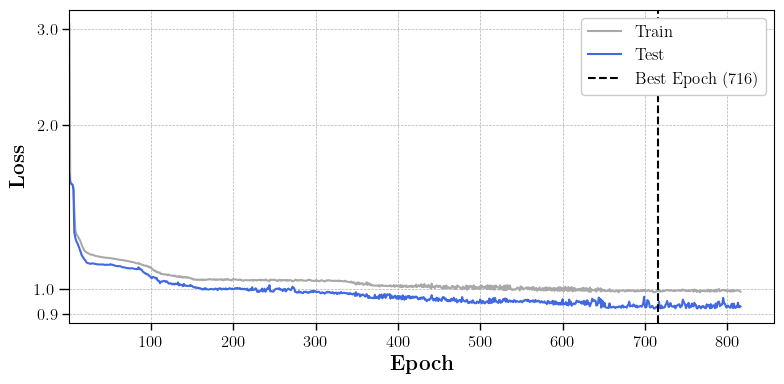

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
fs = 15

# HOST PROP
axes.grid(True, which="both", ls="--", lw=0.5)
axes.set_yscale('log')
# axes.set_xscale('log')

# Plot the prop inference training history
epochs = np.arange(0, len(host_prop_train_history['train']), 1) + 1
axes.plot(epochs, host_prop_train_history['train'], label='Train', color='darkgray')
axes.plot(epochs, host_prop_train_history['test'], label='Test', color='royalblue')
axes.set_ylabel(r'\textbf{Loss}', fontsize=fs)
axes.set_xlabel(r'\textbf{Epoch}', fontsize=fs)
axes.tick_params(axis='y', which='major', length=7, width=1)  # Adjust major tick size
axes.tick_params(axis='x', which='major', length=5, width=1)  # Adjust major tick size
axes.tick_params(axis='y', which='minor', length=5, width=1)  # Adjust minor tick size
best_epoch = np.argmin(host_prop_train_history['test']) + 1
axes.axvline(x=best_epoch, linestyle='--', color='k', label=f'Best Epoch ({best_epoch})')
axes.legend(loc='upper right', framealpha=1)

def integer_formatter(x, pos):
    """Attempt to format tick labels as integers, ignoring the position."""
    return f"{round(x, 1)}"


# Apply the custom formatter to each axis
axes.yaxis.set_major_formatter(ticker.FuncFormatter(integer_formatter))
axes.yaxis.set_minor_formatter(ticker.FuncFormatter(integer_formatter))

# Begin plot at epoch 0
xlims = axes.get_xlim()
axes.set_xlim((1, xlims[1]))

plt.tight_layout()
plt.savefig('Figures/train_history.png', bbox_inches='tight', dpi=300)
# plt.savefig('Figures/train_history.pdf', bbox_inches='tight')